In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [115]:
data = pd.read_csv("/content/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [104]:
data.shape

(1599, 12)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [106]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [107]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [108]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

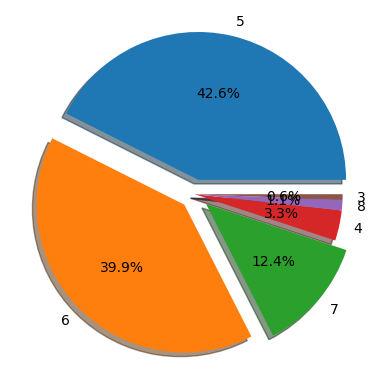

In [109]:
plt.pie(data['quality'].value_counts(),labels=['5','6','7','4','8','3'],autopct='%0.1f%%',shadow=True,explode=[0.1,0.1,0.1,0,0,0])
plt.show()

#Outlier replacement

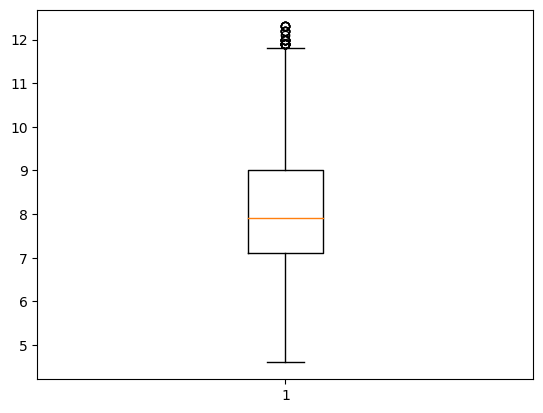

In [110]:
q3 = data['fixed acidity'].quantile(0.75)
q1 = data['fixed acidity'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['fixed acidity'] = np.where(data['fixed acidity'] > r,7.9,data['fixed acidity'])
plt.boxplot(data['fixed acidity'])
plt.show()

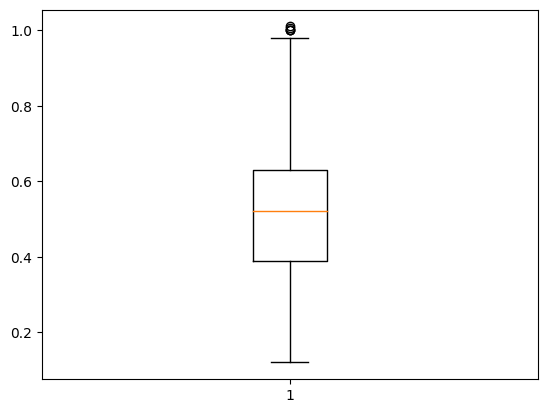

In [111]:
q3 = data['volatile acidity'].quantile(0.75)
q1 = data['volatile acidity'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['volatile acidity'] = np.where(data['volatile acidity'] > r,data['volatile acidity'].median(),data['volatile acidity'])
plt.boxplot(data['volatile acidity'])
plt.show()

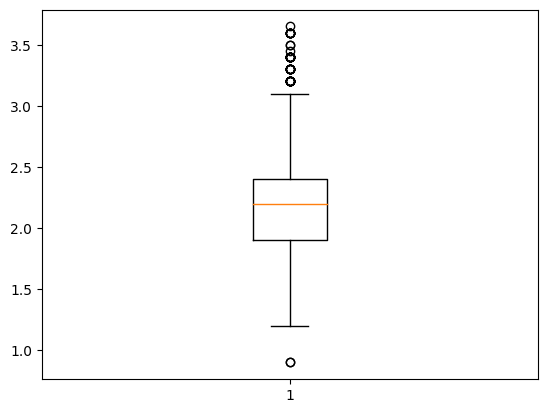

In [112]:
q3 = data['residual sugar'].quantile(0.75)
q1 = data['residual sugar'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['residual sugar'] = np.where(data['residual sugar'] > r,data['residual sugar'].median(),data['residual sugar'])
plt.boxplot(data['residual sugar'])
plt.show()

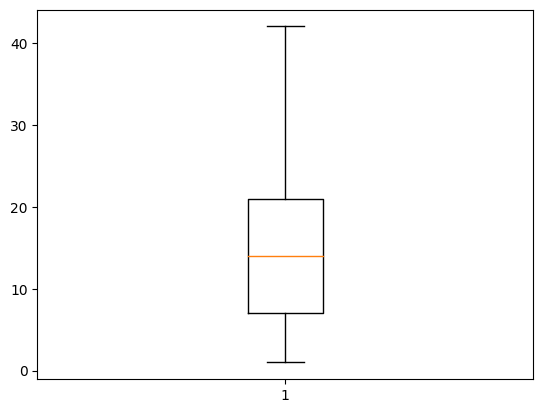

In [117]:
q3 = data['free sulfur dioxide'].quantile(0.75)
q1 = data['free sulfur dioxide'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['free sulfur dioxide'] = np.where(data['free sulfur dioxide'] > r,data['free sulfur dioxide'].median(),data['free sulfur dioxide'])
plt.boxplot(data['free sulfur dioxide'])
plt.show()

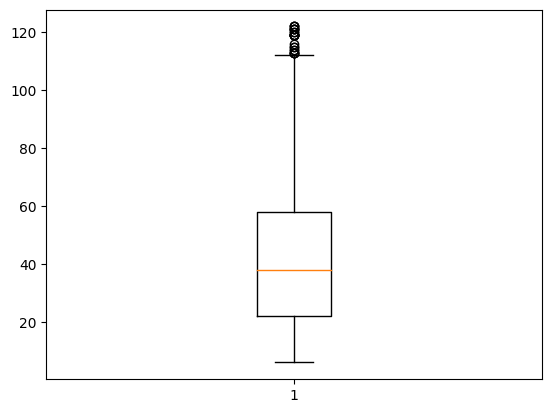

In [116]:
q3 = data['total sulfur dioxide'].quantile(0.75)
q1 = data['total sulfur dioxide'].quantile(0.25)
IQR = q3-q1
r = q3 + 1.5*IQR
data['total sulfur dioxide'] = np.where(data['total sulfur dioxide'] > r,data['total sulfur dioxide'].median(),data['total sulfur dioxide'])
plt.boxplot(data['total sulfur dioxide'])
plt.show()

<ipython-input-119-2eb815ec6029>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total sulfur dioxide'])


<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

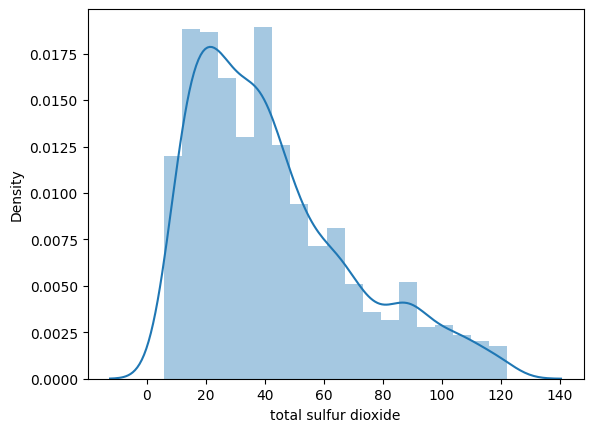

In [119]:
sns.distplot(data['total sulfur dioxide'])

<ipython-input-120-9ce672aee668>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

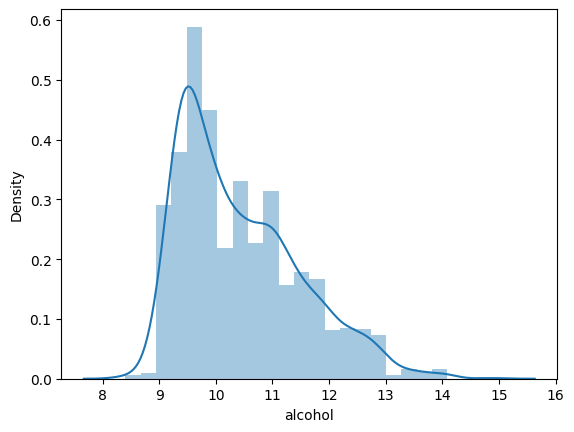

In [120]:
sns.distplot(data['alcohol'])

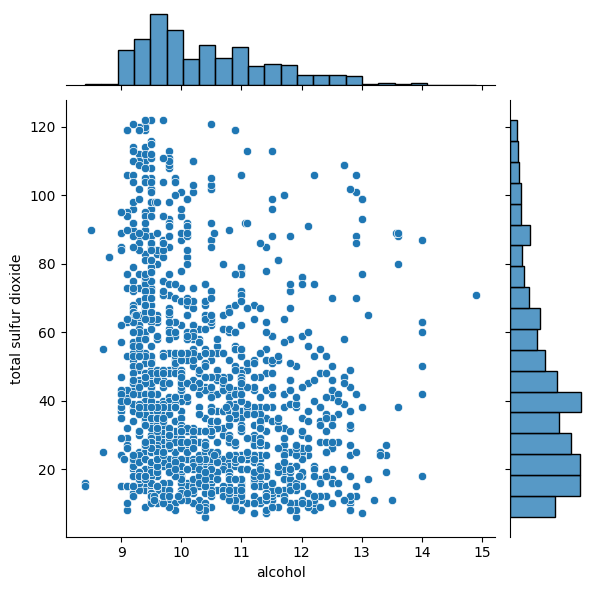

In [121]:
sns.jointplot(data=data,x=data['alcohol'],y=data['total sulfur dioxide'])

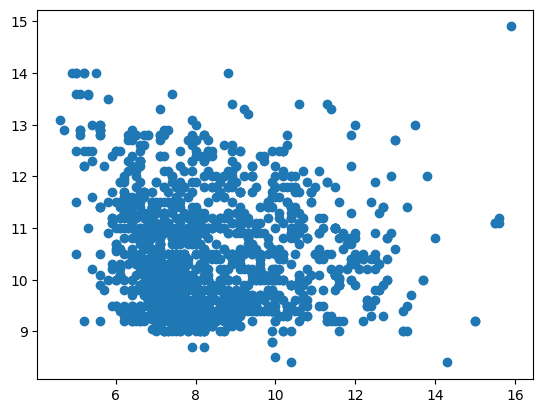

In [123]:
plt.scatter(data['fixed acidity'],data['alcohol'])
plt.show()

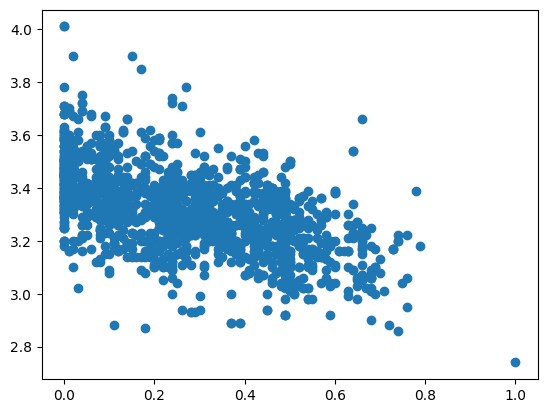

In [124]:
plt.scatter(data['citric acid'],data['pH'])
plt.show()

In [125]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.159226,-0.119186,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.001803,0.075087,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.056013,-0.008622,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.044434,0.142935,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,-0.041814,0.058148,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.159226,-0.001803,-0.056013,0.044434,-0.041814,1.000000,0.596640,-0.068194,0.076710,0.049022,-0.053316,-0.047187
total sulfur dioxide,-0.119186,0.075087,-0.008622,0.142935,0.058148,0.596640,1.000000,0.083695,0.000408,0.014778,-0.201234,-0.168010
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.068194,0.083695,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.076710,0.000408,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.049022,0.014778,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

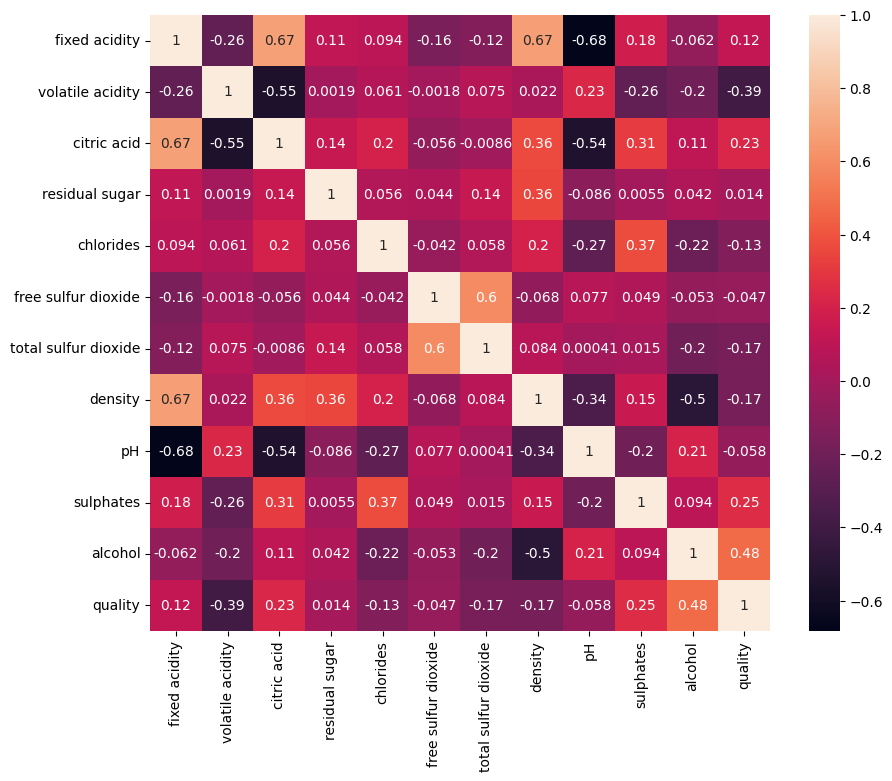

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,)

In [129]:
data.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.047187
pH                     -0.057731
chlorides              -0.128907
total sulfur dioxide   -0.168010
density                -0.174919
volatile acidity       -0.390558
Name: quality, dtype: float64

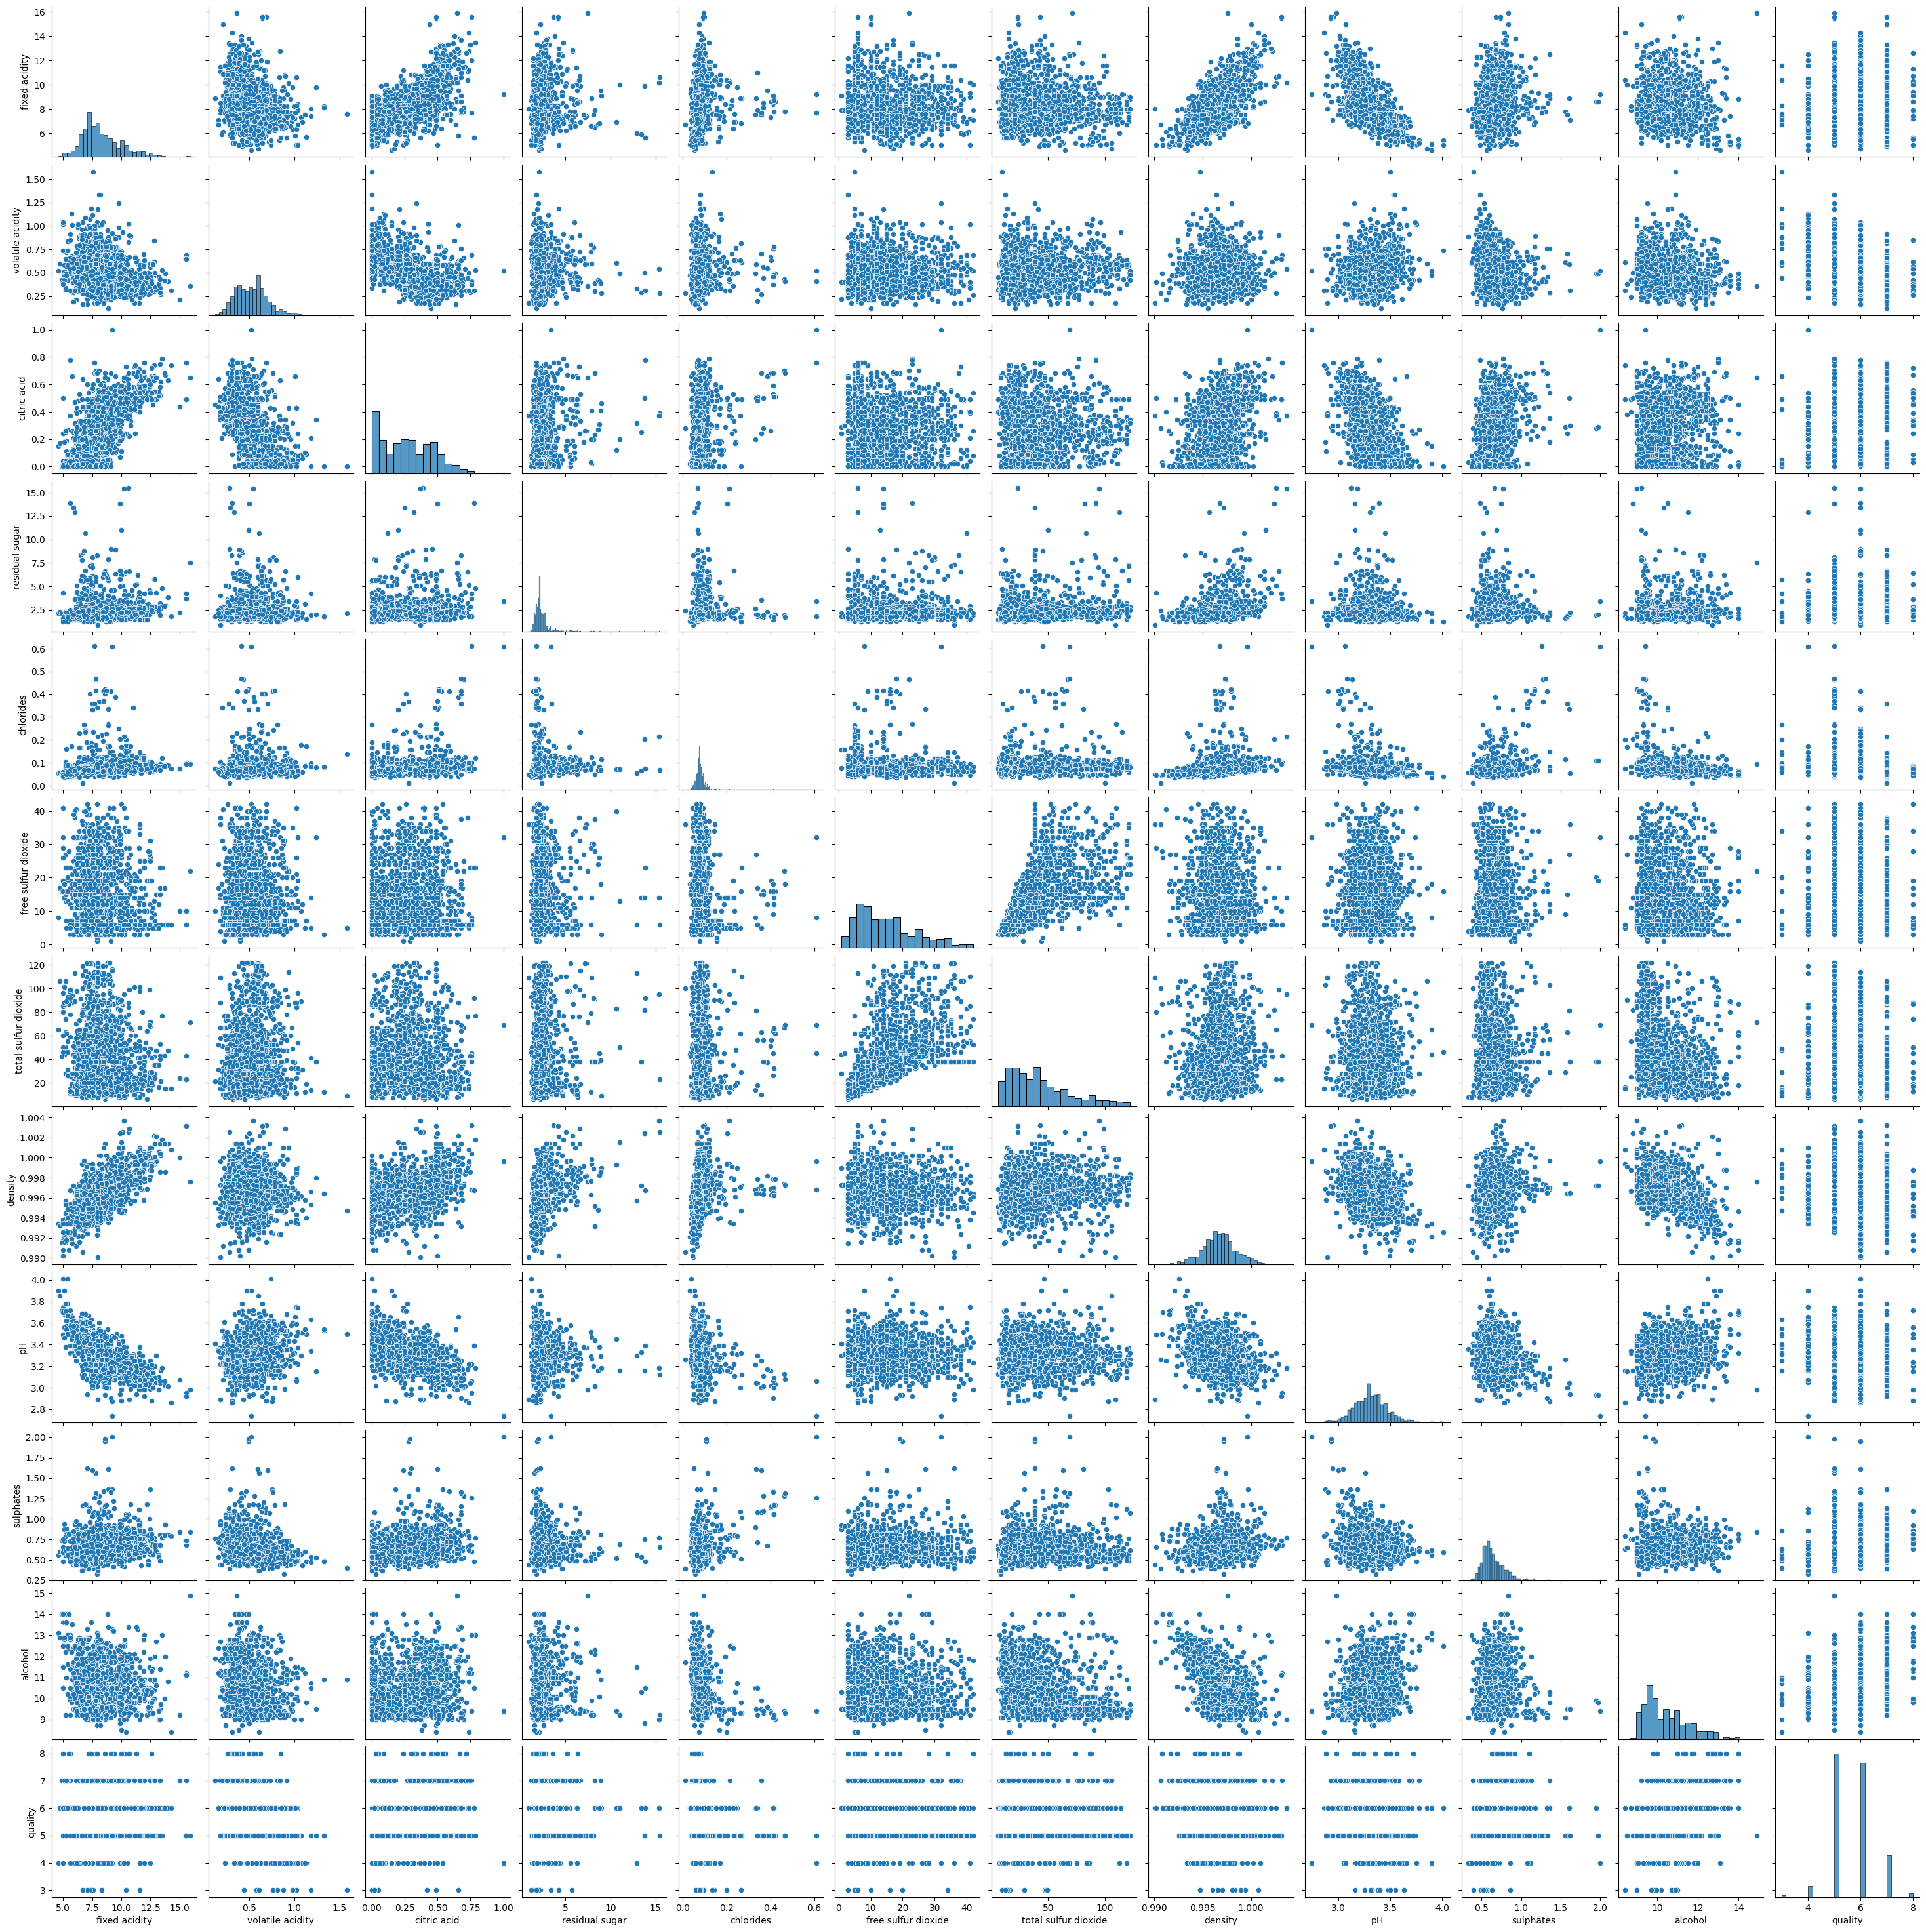

In [130]:
sns.pairplot(data)

In [131]:
x = data.drop(columns=['quality'],axis=1)

In [132]:
y = data['quality']

In [133]:
scale = MinMaxScaler()
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.243902,0.241379,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.585366,0.525862,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.341463,0.413793,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.390244,0.465517,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.243902,0.241379,0.567548,0.606299,0.137725,0.153846


In [168]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [169]:
x_train.shape

(1279, 11)

In [170]:
x_test.shape

(320, 11)

#Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
pred1 = model1.predict(x_test)

In [174]:
from sklearn.metrics import accuracy_score,classification_report

In [175]:
print(accuracy_score(y_test,pred1))

0.625


In [176]:
pd.crosstab(y_test,pred1)

col_0,5,6,7
quality,,,
3,2,0,0
4,7,4,0
5,107,27,1
6,48,87,7
7,2,19,6
8,0,1,2


In [185]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.64      0.79      0.71       135
           6       0.63      0.61      0.62       142
           7       0.38      0.22      0.28        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.28      0.27      0.27       320
weighted avg       0.58      0.62      0.60       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
pred1_train = model1.predict(x_train)
accuracy_score(y_train,pred1_train)

0.5879593432369038

#Random Value Logistic Regression

In [207]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.43,0.082192,0.265442,0.634146,0.517241,0.596916,0.338583,0.257485,0.369231
1032,0.309735,0.479452,0.00,0.219178,0.138564,0.097561,0.068966,0.621880,0.488189,0.119760,0.184615
1002,0.398230,0.116438,0.33,0.078767,0.085142,0.292683,0.181034,0.373715,0.409449,0.305389,0.507692
487,0.495575,0.359589,0.36,0.061644,0.068447,0.097561,0.068966,0.596916,0.338583,0.053892,0.246154
979,0.672566,0.226027,0.49,0.034247,0.105175,0.048780,0.000000,0.501468,0.307087,0.179641,0.307692


In [210]:
model1.predict([[0.548673,0.239726,0.43,0.082192,0.265442,0.634146,0.517241,0.596916,0.338583,0.257485,0.369231]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6])

#Decision Tree Classifier

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
model2 = DecisionTreeClassifier()

In [179]:
model2.fit(x_scaled,y)

DecisionTreeClassifier()

In [182]:
pred2 = model2.predict(x_test)

In [183]:
accuracy_score(y_test,pred2)

1.0

In [184]:
pd.crosstab(y_test,pred2)

col_0,3,4,5,6,7,8
quality,,,,,,
3,2,0,0,0,0,0
4,0,11,0,0,0,0
5,0,0,135,0,0,0
6,0,0,0,142,0,0
7,0,0,0,0,27,0
8,0,0,0,0,0,3


In [186]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       142
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00         3

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [189]:
pred2_train = model2.predict(x_train)

In [190]:
accuracy_score(y_train,pred2_train)

1.0

#Random Value Decision Tree

In [211]:
model1.predict([[0.548673,0.239726,0.43,0.082192,0.265442,0.634146,0.517241,0.596916,0.338583,0.257485,0.369231]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6])

#Random Forest Classifier

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
model3 = RandomForestClassifier(criterion='entropy')

In [199]:
model3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [200]:
pred3 = model3.predict(x_test)

In [201]:
accuracy_score(y_test,pred3)

0.740625

In [202]:
pd.crosstab(y_test,pred3)

col_0,5,6,7,8
quality,,,,
3,1,1,0,0
4,7,4,0,0
5,115,18,2,0
6,26,108,8,0
7,1,10,14,2
8,0,1,2,0


In [203]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.77      0.85      0.81       135
           6       0.76      0.76      0.76       142
           7       0.54      0.52      0.53        27
           8       0.00      0.00      0.00         3

    accuracy                           0.74       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.71      0.74      0.72       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
pred3_train = model3.predict(x_train)
accuracy_score(y_train,pred3_train)

1.0

#Random Value Random Forest

In [212]:
model1.predict([[0.548673,0.239726,0.43,0.082192,0.265442,0.634146,0.517241,0.596916,0.338583,0.257485,0.369231]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6])